## Now that we have the data in S3 and the metadata in the Glue Data Catalog, we can start running some SQL queries in our datalake. Let's start with Athena:

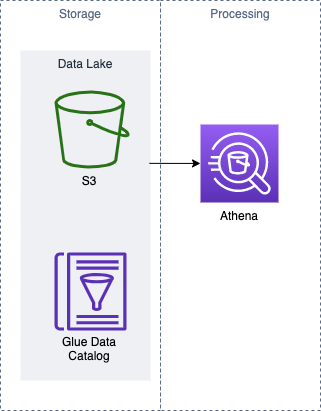

## 1) Install Pythena

In [ ]:
!pip install pythena

In [ ]:
import boto3
import os
import pythena

In [ ]:
import simplejson
with open('/opt/ml/metadata/resource-metadata.json') as fh:
    metadata = simplejson.loads(fh.read())
accountid = metadata['ResourceArn'].split(':')[4]

%set_env accountid={accountid}
%set_env bucket_name=lab-{accountid}
bucket_name = os.getenv('bucket_name')
print(bucket_name)

import boto3

client = boto3.client('athena', region_name="us-east-2")

## 2) Query the tables. Light query first...

In [ ]:
athena_client = pythena.Athena(database="movielens", region="us-east-2") 

# Returns results as a pandas dataframe
df = athena_client.execute("select * from best_movies")

df[0:5]

## 3) Query the tables. Heavy query second... Process 1 million recors...

In [ ]:
sql = "SELECT m.movieid, m.title, avg(r.rating) rating, count(r.rating) votes " \
"FROM movielens.movies m " \
"JOIN movielens.ratings r on m.movieid = r.movieid " \
"group by m.movieid, m.title " \
"having count(r.rating) > 1000 " \
"order by rating desc " \
"limit 5; "

print(sql)

df_join = athena_client.execute(sql)

df_join[0:5]